# Housing
Implementing a Learning Algorithm to determine the median house price in a district.
Characteristic of the algorithm:
- Supervised
- Regression
- Batch learning

# Collect the data

In [1]:
import os
import tarfile
import urllib
URL = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = URL + "datasets/housing/housing.tgz"

# create a function to download the data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # create directory
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # download data
    urllib.request.urlretrieve(housing_url, tgz_path)
    # extract files
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

import pandas as pd
# create a function to load the data with pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Exploratory Data Analysis

In [2]:
fetch_housing_data()
# load DF
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# all attributes are numerical but "ocean_proximity"
housing["ocean_proximity"].value_counts()
# which is categorical

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# statistical description of numerical features
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


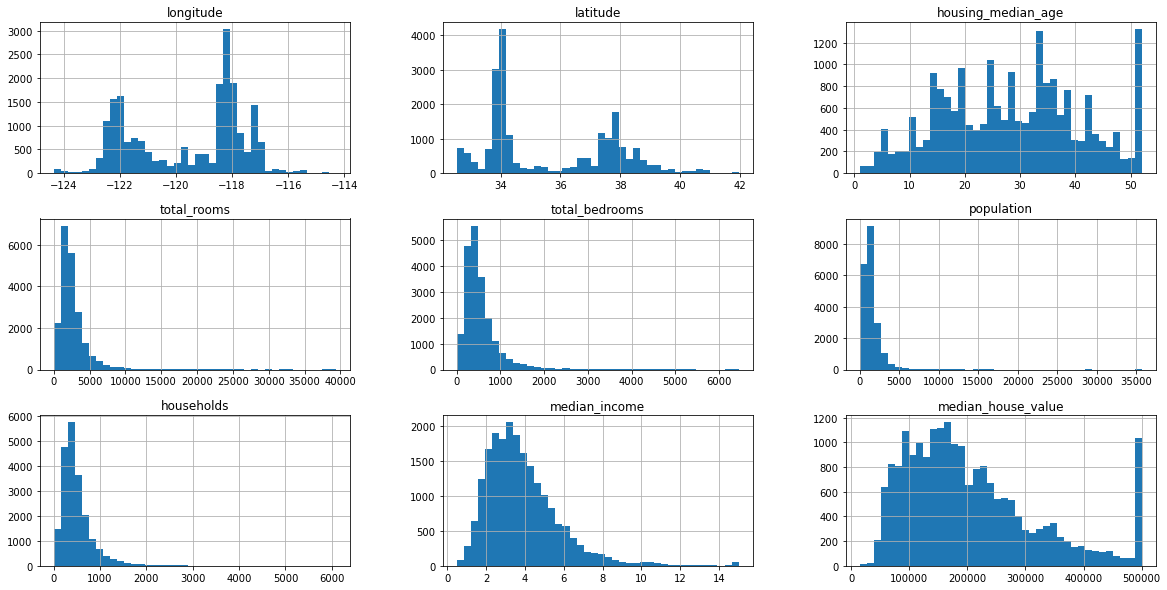

In [6]:
# visualize statistical distribution
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=40,figsize=(20,10))
plt.show()

## Train-Test Split
- $80\%$ Training Set
- $20\%$ Test Set

In [7]:
# I aim at avoiding a skewed train-test split. I want to preserve the correct distribution in the income attribute
# create category labels
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.,1.5,3.,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
# remove column "income_cat" from the train & test sets
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

## Data Visualization

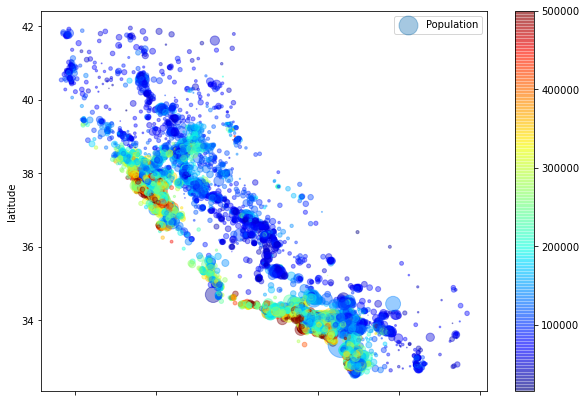

In [8]:
# make a copy of the training set
housing = strat_train_set.copy()
housing.plot(kind='scatter', x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/50, label="Population",
             c=housing["median_house_value"], cmap=plt.get_cmap("jet"),colorbar=True,
             figsize=(10,7))
plt.legend()

## Correlations

In [9]:
# create correlation matrix
corr_matrix = housing.corr()
corr_matrix.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689


In [10]:
# check correlation to target variable
corr_matrix["median_house_value"].sort_values(ascending=True)

latitude             -0.142724
longitude            -0.047432
population           -0.026920
total_bedrooms        0.047689
households            0.064506
housing_median_age    0.114110
total_rooms           0.135097
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

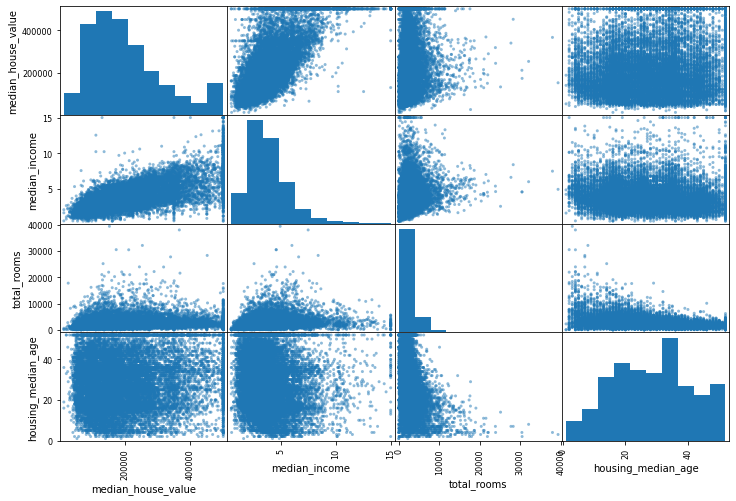

In [11]:
# plot the scatter matrix of promising attributes
from pandas.plotting import scatter_matrix
corr_features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[corr_features], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

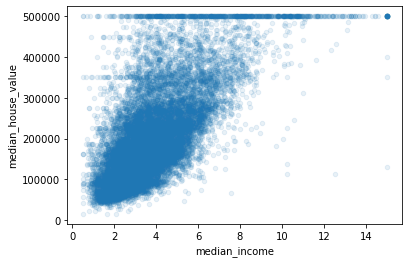

In [12]:
# zoom in the income vs. value scatter plot
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [13]:
# create more useful attributes
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

# check again the correlation matrix
housing.corr()["median_house_value"].sort_values(ascending=True)

bedrooms_per_room          -0.259984
latitude                   -0.142724
longitude                  -0.047432
population                 -0.026920
population_per_household   -0.021985
total_bedrooms              0.047689
households                  0.064506
housing_median_age          0.114110
total_rooms                 0.135097
rooms_per_household         0.146285
median_income               0.687160
median_house_value          1.000000
Name: median_house_value, dtype: float64

# Data Cleaning

In [14]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Replace Missing Values
Replace missing values with the median value of that feature.

In [15]:
from sklearn.impute import SimpleImputer
# create SimpleImputer instance, with median attribute
imputer = SimpleImputer(strategy="median")
# SimpleImputer with strategy="median" takes only numerical 
housing_numerical = housing.drop("ocean_proximity", axis=1)
# "fit" the imputer
imputer.fit(housing_numerical)
# median values are stored in attribute .statistics_
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [16]:
# apply the imputer to the dataframe. the aoutput is an np array
X = imputer.transform(housing_numerical)
# convert back the array to a pd DF
housing_tr = pd.DataFrame(X, columns=housing_numerical.columns, index=housing_numerical.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


## Categorical Attributes
<code>"ocean_proximity"</code> is a categorical attribute.

In [17]:
# isolate categorical features
housing_categorical = housing[["ocean_proximity"]]
housing_categorical.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [18]:
from sklearn.preprocessing import OrdinalEncoder
# create an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_categorical_encoded = ordinal_encoder.fit_transform(housing_categorical)
housing_categorical_encoded[:5]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.]])

Given the fact that the categories are not representing a scale of values (e.g. "good", "average", "bad"), it's preferresd to perform One Hot Encoding.

In [19]:
from sklearn.preprocessing import OneHotEncoder
# create an instance of the OneHotEncoder
one_hot_encoder = OneHotEncoder()
# fit the encoder
housing_categorical_1hot = one_hot_encoder.fit_transform(housing_categorical)
# output is a sparse matrix, convert it to a np array
housing_categorical_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## Create custom transformer

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
# indices of relevant attributes
rooms_ind, bedrooms_ind, population_ind, households_ind = 3, 4, 5, 6
# create custom class
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    # thanks to TransformerMixin I don't need to define the method fit_transform, it mixes the methods fit and transform
    def __init__(self, add_bedrooms_per_room=True):
        # attribute
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        # it does nothing, fit() is just needed for the pipeline
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ind] / X[:, households_ind]
        population_per_household = X[:, population_ind] / X[:, households_ind]
        if self.add_bedrooms_per_room:
            # se è richiesto di creare l'attribute bedrooms_per_room lo creo
            bedrooms_per_room = X[:, bedrooms_ind] / X[:, rooms_ind]
            # return concatenated vectors on axis 1 (col)
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        return np.c_[X, rooms_per_household, population_per_household]
# create an instance of the adder class
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# use the method .transform to get the added attributes
housing_extra_attr = attr_adder.transform(housing.values)

## Create Pipeline
Create Pipeline to:
- fill missing values
- add relevant attributes
- perform feature scaling

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# create pipeline for numerical attributes
num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('attributes_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),
                        ])
# use the pipeline to transform the numerical features
housing_num_tr = num_pipeline.fit_transform(housing_numerical)

In [22]:
# with ColumnTransformer I can transform both numerical and  categorical attrs. at once
from sklearn.compose import ColumnTransformer
numerical_attribs = list(housing_numerical)
categorical_attribs = ["ocean_proximity"]

# create pipeline that takes care of all attributes
# I have to specify which attributes go to the numerical pipeline and which goes to One Hot Encoding
full_pipeline = ColumnTransformer([
                                ("num", num_pipeline, numerical_attribs),
                                ("cat", OneHotEncoder(), categorical_attribs)
                                  ])

housing_prepared = full_pipeline.fit_transform(housing)

# Model Selection

## Linear Regression

In [23]:
# linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
# test the model
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_predictions, housing_labels)
# root mean squared error
lin_rmse = np.sqrt(lin_mse)
print('RMSE of Linear Regression:', lin_rmse)

RMSE of Linear Regression: 68628.19819848923


## Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
# test the model
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions, housing_labels)
tree_rmse = np.sqrt(tree_mse)
print("RMSE of Decision Tree Regressor:", tree_rmse)

RMSE of Decision Tree Regressor: 0.0


Probably it's overfitting the data.

In [25]:
# use k-fold-cross validation
from sklearn.model_selection import cross_val_score
# create a cross validation instance with k=10 folds
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
print("Mean RMSE of Decision Tree Regressor:", tree_rmse_scores.mean())

Mean RMSE of Decision Tree Regressor: 71061.10739608665


## Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
# test the model
housing_predictions = forest_reg.predict(housing_prepared)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("Mean RMSE of Random Forest Regressor:", forest_rmse_scores.mean())

Mean RMSE of Random Forest Regressor: 50163.08029824595


# Hyper-parameters Tuning

In [27]:
# using grid-search for hyperparameters tuning
from sklearn.model_selection import GridSearchCV

# specify parameters values
param_grid = [
                {'n_estimators':[3, 10, 30],'max_features':[2, 4, 6, 8]},
                {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}
                ]
# instance of random forest regression
forest_reg = RandomForestRegressor()
# grid search
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
# fit grid search
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [28]:
# get best parameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [32]:
# get RMSE of tuned model
tuned_forest_rmse = min(np.sqrt(-grid_search.cv_results_['mean_test_score']))
print("Mean RMSE of Tuned Random Forest Regressor:", tuned_forest_rmse)

Mean RMSE of Tuned Random Forest Regressor: 50173.360022613015


# Model Evaluation

In [34]:
# get the tuned model
final_model = grid_search.best_estimator_

# prepare test set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

# make predictions on test set
final_predictions = final_model.predict(X_test_prepared)

# compute final RMSE
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print("Mean RMSE on Test Set:", final_rmse)

Mean RMSE on Test Set: 48326.92468330928
